### First experimentations and testing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

plt.style.use('seaborn-v0_8-deep')

In [ ]:
df = pd.read_csv('sentiment_analysis/Tweets.csv')

In [ ]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


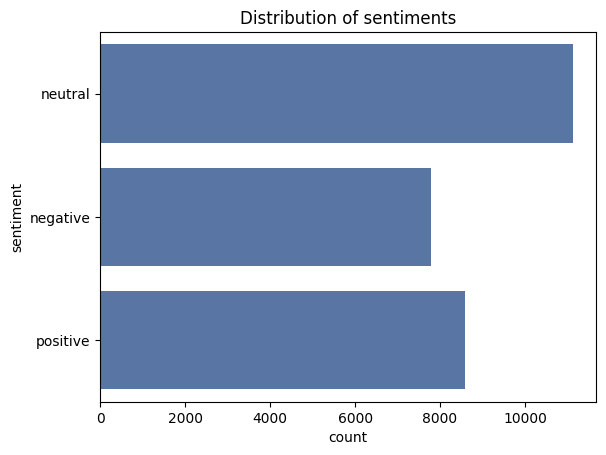

In [ ]:
sns.countplot(df['sentiment'])
plt.title('Distribution of sentiments')
plt.show()

In [ ]:
df.isnull().sum()

,0
textID,0
text,1
selected_text,1
sentiment,0


In [ ]:
df = df.dropna()

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
df_1 = df

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
df_1.replace({'neutral':0, "positive":1,"negative":-1}, inplace=True)

<ipython-input-11-a5a9133fd4dd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1.replace({'neutral':0, "positive":1,"negative":-1}, inplace=True)


In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(text):
  stemmed_text = re.sub("[^a-zA-Z]", " ", text)
  stemmed_text = stemmed_text.lower()
  stemmed_text = stemmed_text.split()
  stemmed_text = [port_stem.stem(word) for word in stemmed_text if not word in stopwords.words("english")]
  stemmed_text = " ".join(stemmed_text)

  return stemmed_text

In [ ]:
df_1["stemmed_text"] = df_1["text"].apply(stemming)

In [ ]:
df_1.drop(columns=["textID","text","selected_text"], inplace=True)

In [ ]:
df_1.head(20)

,sentiment,stemmed_text
0,0,respond go
1,-1,sooo sad miss san diego
2,-1,boss bulli
3,-1,interview leav alon
4,-1,son put releas alreadi bought
5,0,http www dothebounci com smf shameless plug be...
6,1,feed babi fun smile coo
7,0,soooo high
8,0,
9,1,journey wow u becam cooler hehe possibl


In [ ]:
X = df_1.drop(columns=["sentiment"])
y = df_1["sentiment"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify = y , random_state=42)

In [ ]:
X_train.shape

(24732, 1)

In [ ]:
y_train.shape

(24732,)

In [ ]:
y_test.shape

(2748,)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_df=0.9, min_df=5, max_features=10000)

X_train = X_train["stemmed_text"].tolist()
X_test = X_test["stemmed_text"].tolist()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
print(X_test)

  (0, 276)	0.4358832219911681
  (0, 702)	0.3028405266188341
  (0, 1459)	0.31296207295522266
  (0, 1611)	0.26956156753562593
  (0, 1804)	0.25811585150231625
  (0, 2358)	0.38691713546892936
  (0, 2731)	0.23802458193853668
  (0, 3938)	0.2775064413368313
  (0, 4315)	0.25681431140235716
  (0, 4790)	0.3629558578882146
  (1, 684)	0.4100371300625401
  (1, 1220)	0.278405271385053
  (1, 1490)	0.3795981188275083
  (1, 1630)	0.3913592081129692
  (1, 1817)	0.18951670538797882
  (1, 1856)	0.3634383592335941
  (1, 2238)	0.28371392728301953
  (1, 4755)	0.20581296504331864
  (1, 4862)	0.334912079691614
  (1, 5166)	0.23255236490248232
  (2, 137)	0.41923184934756325
  (2, 746)	0.21357516465844834
  (2, 2247)	0.19795321757340373
  (2, 2260)	0.261722788898469
  (2, 2516)	0.41504763883780316
  :	:
  (2743, 1336)	0.6829658125719328
  (2744, 616)	0.5404264790068293
  (2744, 706)	0.5593086528950201
  (2744, 2813)	0.4990996577338139
  (2744, 3040)	0.3821159290516806
  (2745, 276)	0.31870432159015377
  (2745, 28

In [ ]:
print(X_train)

  (0, 3107)	0.4557422845584787
  (0, 659)	0.5546630787461874
  (0, 4409)	0.4417060043848019
  (0, 1469)	0.5380925987519553
  (1, 4409)	0.23299163312072413
  (1, 95)	0.33419498088376787
  (1, 5166)	0.23576959252524682
  (1, 1220)	0.2822568474797482
  (1, 2403)	0.4310447747599608
  (1, 686)	0.34884327814974736
  (1, 4260)	0.4610140015504067
  (1, 2752)	0.4227851046991407
  (2, 5291)	0.36538744593714007
  (2, 5384)	0.3845200813119686
  (2, 4947)	0.4157146479511587
  (2, 1518)	0.38997135538886635
  (2, 5306)	0.627487047574996
  (3, 3107)	0.3534315612486421
  (3, 1817)	0.28248377737483765
  (3, 5375)	0.43775960027697275
  (3, 1838)	0.4395656971389039
  (3, 3116)	0.6406540230869741
  (4, 1269)	0.28586549256089044
  (4, 285)	0.7563824654722672
  (4, 1060)	0.37251242985472693
  :	:
  (24729, 4001)	0.3081938650467485
  (24729, 4003)	0.37921110548944964
  (24729, 4675)	0.23185127623983784
  (24729, 1409)	0.31530048398004534
  (24729, 3145)	0.21903608969907654
  (24729, 134)	0.3512671730810491
  

### Testing different models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(C=0.5, max_iter=1000, solver='liblinear')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

model_accuracy = accuracy_score(y_test,y_pred)
y_training_pred = model.predict(X_train)
training_accuracy = accuracy_score(y_train,y_training_pred)

print("Training accuracy is ", training_accuracy)

print("Model accuracy is ", model_accuracy)


Training accuracy is  0.7347970240983341
Model accuracy is  0.6895924308588064


In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_training_pred = model.predict(X_train)
training_accuracy = accuracy_score(y_train,y_training_pred)

print("Training accuracy is ", training_accuracy)
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Training accuracy is  0.727721170952612
Model Accuracy: 0.6320960698689956


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Convert categorical labels to numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialize the XGBClassifier with default parameters
xgbc_model = XGBClassifier(tree_method = 'hist', subsample = 0.9, n_estimators = 500, min_child_weight = 2, max_depth = 8, learning_rate = 0.1, colsample_bytree = 1)

# Fit the model
xgbc_model.fit(X_train, y_train_encoded)

# Make predictions
y_pred_encoded = xgbc_model.predict(X_test)

# Convert predictions back to original class labels
y_pred_xgbc = label_encoder.inverse_transform(y_pred_encoded)

Accuracy: 0.7150655021834061



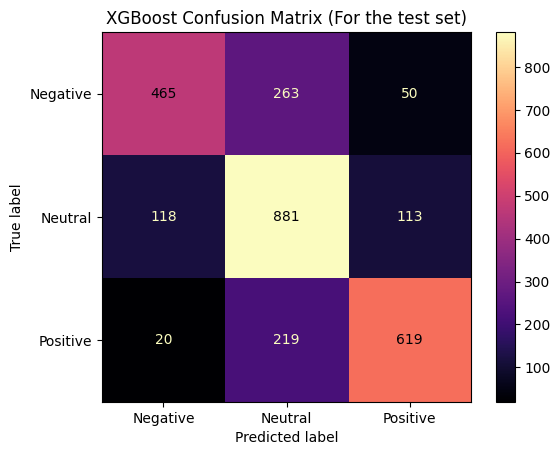


Classification Report for the test set:
              precision    recall  f1-score   support

          -1       0.77      0.60      0.67       778
           0       0.65      0.79      0.71      1112
           1       0.79      0.72      0.75       858

    accuracy                           0.72      2748
   macro avg       0.74      0.70      0.71      2748
weighted avg       0.73      0.72      0.71      2748



In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_xgbc)
print(f'Accuracy: {accuracy}\n')

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgbc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot(cmap='magma')
plt.title('XGBoost Confusion Matrix (For the test set)')
plt.show()

# Print the classification report
print(f"\nClassification Report for the test set:")
print(classification_report(y_test, y_pred_xgbc))

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical

# Convert labels if necessary
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

# Define model
def build_model(input_dim, learning_rate=0.001):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')  # 3 neurons for 3 classes
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',  # For one-hot labels
                  metrics=['accuracy'])
    return model

# Build and train model
input_dim = X_train.shape[1]
model = build_model(input_dim, learning_rate = 0.0005)
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.3, verbose=1)

# Evaluate
print("\nEvaluation on test data:")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/20
271/271 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4479 - loss: 1.0646 - val_accuracy: 0.6205 - val_loss: 0.8682
Epoch 2/20
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7002 - loss: 0.7770 - val_accuracy: 0.6844 - val_loss: 0.7544
Epoch 3/20
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7710 - loss: 0.6164 - val_accuracy: 0.6833 - val_loss: 0.7502
Epoch 4/20
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8016 - loss: 0.5352 - val_accuracy: 0.6771 - val_loss: 0.7794
Epoch 5/20
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8255 - loss: 0.4790 - val_accuracy: 0.6701 - val_loss: 0.8133
Epoch 6/20
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8417 - loss: 0.4356 - val_accuracy: 0.6629 - val_loss: 0.8546
Epoch 7/20
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8610 - loss: 0.3991 - val_accuracy: 0.6566 - val_loss: 0.9004
Epoch 8/20
271/271 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8745 - loss: 0.3708 - val_accuracy: 

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Evaluation on test data:
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6209 - loss: 1.4389
Test Accuracy: 0.6252


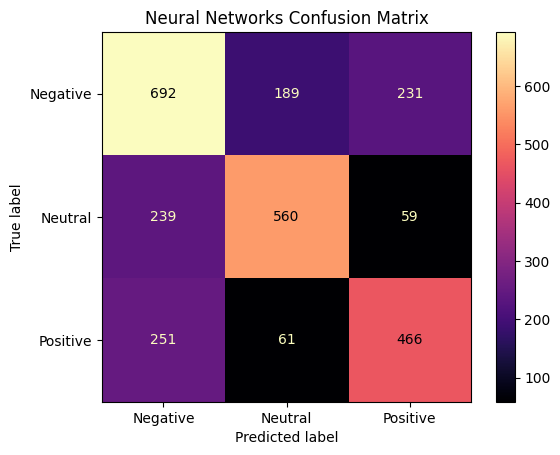


Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.62      0.60      1112
           1       0.69      0.65      0.67       858
           2       0.62      0.60      0.61       778

    accuracy                           0.63      2748
   macro avg       0.63      0.62      0.63      2748
weighted avg       0.63      0.63      0.63      2748



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Predict class probabilities
y_pred_prob = model.predict(X_test)  # Output shape: (num_samples, 3)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)  # Picks the index with the highest probability

X_test_dense = X_test.toarray()  # Convert sparse matrix to dense

# Evaluate
print("\nEvaluation on test data:")
test_loss, test_acc = model.evaluate(X_test_dense, y_test, verbose=1)  # Use dense array here
print(f"Test Accuracy: {test_acc:.4f}")

# Create and display the confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)  # Convert one-hot y_test back to labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot(cmap='magma')
plt.title('Neural Networks Confusion Matrix')
plt.show()

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred))


### Final model 

Using 3 datasets and XGBClassifier

In [67]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import FunctionTransformer
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [68]:
df_1 = pd.read_csv("archive/Tweets.csv")
df_1.drop(columns=["selected_text","textID"], inplace=True)
df_1["sentiment"].replace({'neutral': 0, "positive": 1, "negative": -1}, inplace=True)

C:\Users\filip\AppData\Local\Temp\ipykernel_2680\3321751275.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1["sentiment"].replace({'neutral': 0, "positive": 1, "negative": -1}, inplace=True)
C:\Users\filip\AppData\Local\Temp\ipykernel_2680\3321751275.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting'

In [69]:
df_2 = pd.read_csv("archive/sentiment_analysis.csv", encoding="unicode_escape")

In [70]:
df_2["sentiment"].replace({'neutral': 0, "positive": 1, "negative": -1}, inplace=True)
df_2.drop(columns=["Year", "Month", "Day","Time of Tweet","Platform"], inplace=True)
df_2.dropna(inplace=True)

C:\Users\filip\AppData\Local\Temp\ipykernel_2680\3469691826.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2["sentiment"].replace({'neutral': 0, "positive": 1, "negative": -1}, inplace=True)
C:\Users\filip\AppData\Local\Temp\ipykernel_2680\3469691826.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting'

In [71]:
df_3 = pd.read_csv("archive/twitter_training.csv", names=["ID", "Unnamed","sentiment","text"], encoding="unicode_escape")

In [72]:
df_3["sentiment"].replace({'Neutral': 0, "Positive": 1, "Negative": -1}, inplace=True)
df_3.drop(columns=["ID", "Unnamed"], inplace=True)
df_3.dropna(inplace=True)

C:\Users\filip\AppData\Local\Temp\ipykernel_2680\3652049930.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_3["sentiment"].replace({'Neutral': 0, "Positive": 1, "Negative": -1}, inplace=True)


In [73]:
df_2

,text,sentiment
0,What a great day!!! Looks like dream.,1
1,"I feel sorry, I miss you here in the sea beach",1
2,Don't angry me,-1
3,We attend in the class just for listening teac...,-1
4,"Those who want to go, let them go",-1
...,...,...
494,"According to , a quarter of families under six...",-1
495,the plan to not spend money is not going well,-1
496,uploading all my bamboozle pictures of facebook,0
497,congratulations ! you guys finish a month ear...,1


In [74]:
df_3

,sentiment,text
0,1,im getting on borderlands and i will murder yo...
1,1,I am coming to the borders and I will kill you...
2,1,im getting on borderlands and i will kill you ...
3,1,im coming on borderlands and i will murder you...
4,1,im getting on borderlands 2 and i will murder ...
...,...,...
74677,1,Just realized that the Windows partition of my...
74678,1,Just realized that my Mac window partition is ...
74679,1,Just realized the windows partition of my Mac ...
74680,1,Just realized between the windows partition of...


In [75]:
df_1

,text,sentiment
0,"I`d have responded, if I were going",0
1,Sooo SAD I will miss you here in San Diego!!!,-1
2,my boss is bullying me...,-1
3,what interview! leave me alone,-1
4,"Sons of ****, why couldn`t they put them on t...",-1
...,...,...
27476,wish we could come see u on Denver husband l...,-1
27477,I`ve wondered about rake to. The client has ...,-1
27478,Yay good for both of you. Enjoy the break - y...,1
27479,But it was worth it ****.,1


In [76]:
combined_df = pd.concat([df_1, df_2, df_3], ignore_index=True)

In [77]:
combined_df

,text,sentiment
0,"I`d have responded, if I were going",0
1,Sooo SAD I will miss you here in San Diego!!!,-1
2,my boss is bullying me...,-1
3,what interview! leave me alone,-1
4,"Sons of ****, why couldn`t they put them on t...",-1
...,...,...
101971,Just realized that the Windows partition of my...,1
101972,Just realized that my Mac window partition is ...,1
101973,Just realized the windows partition of my Mac ...,1
101974,Just realized between the windows partition of...,1


In [78]:
combined_df["sentiment"].value_counts()

sentiment
-1            30273
0             29425
1             29403
Irrelevant    12875
Name: count, dtype: int64

In [79]:
combined_df = combined_df[combined_df["sentiment"] != "Irrelevant"]

In [80]:
combined_df["sentiment"].value_counts()

sentiment
-1    30273
0     29425
1     29403
Name: count, dtype: int64

In [81]:
combined_df.duplicated().sum()

4032

In [82]:
combined_df.drop_duplicates(inplace=True)

C:\Users\filip\AppData\Local\Temp\ipykernel_2680\2078173332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df.drop_duplicates(inplace=True)


In [83]:
combined_df.isna().sum()
combined_df.dropna(inplace=True)

C:\Users\filip\AppData\Local\Temp\ipykernel_2680\49965046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df.dropna(inplace=True)


In [84]:
combined_df["sentiment"] = combined_df["sentiment"].astype(int)

C:\Users\filip\AppData\Local\Temp\ipykernel_2680\1204051473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df["sentiment"] = combined_df["sentiment"].astype(int)


In [85]:
import re
import nltk
import emoji 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

nltk.download("punkt_tab")

# Download stopwords
nltk.download("stopwords")

def stemming(text):
    
    port_stem = PorterStemmer()
    text = emoji.demojize(text) # Transform emoji into text
    text = re.sub("[^a-zA-Z]", " ", text).lower()  # Remove non-alphabetic characters & lowercase
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords.words("english"))  
    words = [port_stem.stem(word) for word in words if word not in stop_words]  
    return " ".join(words)

# Define feature and target variables
X = combined_df["text"]  # Ensure we select the text column
y = combined_df["sentiment"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Define Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(preprocessor=stemming, ngram_range=(1,2), max_df=0.9, min_df=5, max_features=10000)),
    ("classifier", XGBClassifier(tree_method = 'hist', subsample = 0.9, n_estimators = 800, min_child_weight = 2, max_depth = 8, learning_rate = 0.1, colsample_bytree = 1, random_state = 42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)


print("Training accuracy:", accuracy_score(y_train, y_train_pred))
print("Test accuracy:", accuracy_score(y_test, y_pred))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\filip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\filip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Training accuracy: 0.843859288212302
Test accuracy: 0.7668390737040085


In [86]:
pipeline.predict(["I love this 😭😭😭"])[0]

2

Model export

In [87]:
import dill

with open('my_pipeline8.pkl', 'wb') as f:
    dill.dump(pipeline, f)

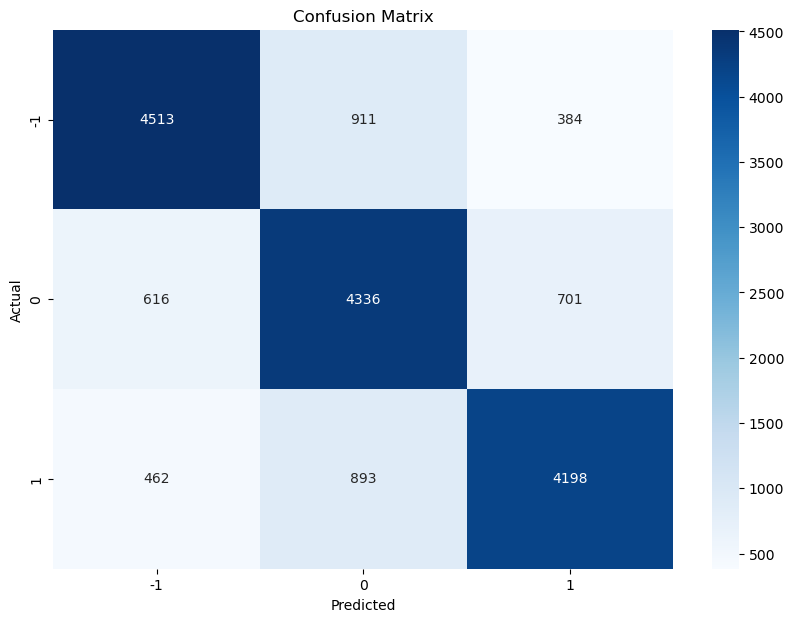

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Validation test

In [89]:
validation = pd.read_csv("archive/twitter_validation.csv", names=["ID", "Unnamed","sentiment","text"], encoding="unicode_escape")

In [90]:
validation.drop(columns=["ID", "Unnamed"], inplace=True)

In [91]:
validation = validation[validation["sentiment"] != "Irrelevant"]
validation["sentiment"].replace({'Neutral': 0, "Positive": 1, "Negative": -1}, inplace=True)
validation["sentiment"] = validation["sentiment"].astype(int)

C:\Users\filip\AppData\Local\Temp\ipykernel_2680\1474869496.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  validation["sentiment"].replace({'Neutral': 0, "Positive": 1, "Negative": -1}, inplace=True)
C:\Users\filip\AppData\Local\Temp\ipykernel_2680\1474869496.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downca

In [92]:
# Extract features and labels from the validation dataset
X_validation = validation["text"]
y_validation = validation["sentiment"]

# Encode the labels
y_validation_encoded = label_encoder.transform(y_validation)

# Predict using the pipeline
y_validation_pred = pipeline.predict(X_validation)

# Calculate accuracy
validation_accuracy = accuracy_score(y_validation_encoded, y_validation_pred)
print("Validation accuracy:", validation_accuracy)

Validation accuracy: 0.8973429951690821
